In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

In [2]:
df=pd.read_csv("Monefy_smita.csv")

In [3]:
df

,date,account,category,amount,currency,converted amount,currency.1,description
0,27/07/2022,Cash,Salary,"8,000",INR,"8,000",INR,Papa
1,27/07/2022,Cash,Clothes,"-1,130",INR,"-1,130",INR,"Pant,scarp,slip,towel"
2,27/07/2022,Cash,Food,-40,INR,-40,INR,Gul
3,27/07/2022,Cash,Health,-100,INR,-100,INR,Medicine
4,30/07/2022,Cash,Sports,-140,INR,-140,INR,Dinner(2 thali)
...,...,...,...,...,...,...,...,...
879,16/06/2023,Cash,Sports,-40,INR,-40,INR,Rice and kanis
880,16/06/2023,Cash,Food,-38,INR,-38,INR,3 roti + 2 rusk
881,17/06/2023,Cash,Transport,"-5,000",INR,"-5,000",INR,Train tickets
882,18/06/2023,Cash,Food,-38,INR,-38,INR,2 rusk + 3 roti


In [4]:
print(df.columns)

Index(['date', 'account', 'category', 'amount', 'currency', 'converted amount',
       'currency.1', 'description'],
      dtype='object')


In [5]:
# List the columns to drop
columns_to_drop = ['account', 'converted amount', 'currency.1']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
print(df)

           date   category  amount currency            description
0    27/07/2022     Salary   8,000      INR                   Papa
1    27/07/2022    Clothes  -1,130      INR  Pant,scarp,slip,towel
2    27/07/2022       Food     -40      INR                    Gul
3    27/07/2022     Health    -100      INR               Medicine
4    30/07/2022     Sports    -140      INR        Dinner(2 thali)
..          ...        ...     ...      ...                    ...
879  16/06/2023     Sports     -40      INR       Rice and kanis  
880  16/06/2023       Food     -38      INR       3 roti + 2 rusk 
881  17/06/2023  Transport  -5,000      INR         Train tickets 
882  18/06/2023       Food     -38      INR        2 rusk + 3 roti
883  22/07/2023        Car    -301      INR                    Cab

[884 rows x 5 columns]


In [6]:
unique_categories = df['category'].unique()

# Print the unique categories
print(unique_categories)

['Salary' 'Clothes' 'Food' 'Health' 'Sports' 'Car' 'Communications'
 'Eating out' 'Bills' 'Toiletry' 'House' 'Gifts' 'Taxi' 'Transport'
 'Entertainment']


In [7]:
# Get the data types of all columns
column_data_types = df.dtypes

# Print the data types of all columns
print(column_data_types)


date           object
category       object
amount         object
currency       object
description    object
dtype: object


In [8]:
# Convert 'amount' column to numeric type
df['amount'] = df['amount'].str.replace(',', '').astype(float)

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Print the updated data types
print(df.dtypes)

date           datetime64[ns]
category               object
amount                float64
currency               object
description            object
dtype: object


In [9]:
df.head()

,date,category,amount,currency,description
0,2022-07-27,Salary,8000.0,INR,Papa
1,2022-07-27,Clothes,-1130.0,INR,"Pant,scarp,slip,towel"
2,2022-07-27,Food,-40.0,INR,Gul
3,2022-07-27,Health,-100.0,INR,Medicine
4,2022-07-30,Sports,-140.0,INR,Dinner(2 thali)


In [10]:
# Convert negative values to positive in a specific column
df['amount'] = df['amount'].abs()

# Print the updated DataFrame
print(df)

          date   category  amount currency            description
0   2022-07-27     Salary  8000.0      INR                   Papa
1   2022-07-27    Clothes  1130.0      INR  Pant,scarp,slip,towel
2   2022-07-27       Food    40.0      INR                    Gul
3   2022-07-27     Health   100.0      INR               Medicine
4   2022-07-30     Sports   140.0      INR        Dinner(2 thali)
..         ...        ...     ...      ...                    ...
879 2023-06-16     Sports    40.0      INR       Rice and kanis  
880 2023-06-16       Food    38.0      INR       3 roti + 2 rusk 
881 2023-06-17  Transport  5000.0      INR         Train tickets 
882 2023-06-18       Food    38.0      INR        2 rusk + 3 roti
883 2023-07-22        Car   301.0      INR                    Cab

[884 rows x 5 columns]


In [11]:
# Replace 'Sports' with 'Combined' in the 'category' column
df['category'] = df['category'].replace('Sports', 'Combined')

# Print the updated DataFrame
print(df)

          date   category  amount currency            description
0   2022-07-27     Salary  8000.0      INR                   Papa
1   2022-07-27    Clothes  1130.0      INR  Pant,scarp,slip,towel
2   2022-07-27       Food    40.0      INR                    Gul
3   2022-07-27     Health   100.0      INR               Medicine
4   2022-07-30   Combined   140.0      INR        Dinner(2 thali)
..         ...        ...     ...      ...                    ...
879 2023-06-16   Combined    40.0      INR       Rice and kanis  
880 2023-06-16       Food    38.0      INR       3 roti + 2 rusk 
881 2023-06-17  Transport  5000.0      INR         Train tickets 
882 2023-06-18       Food    38.0      INR        2 rusk + 3 roti
883 2023-07-22        Car   301.0      INR                    Cab

[884 rows x 5 columns]


In [12]:
# Group the DataFrame by 'category' and aggregate 'date' and 'amount'
unique_categories = df.groupby('category').agg({ 'amount': 'unique'})

# Print the unique elements with respect to 'date' and 'amount'
print(unique_categories)

                                                           amount
category                                                         
Bills                   [250.0, 20.0, 500.0, 486.0, 315.0, 590.0]
Car             [30.0, 20.0, 50.0, 60.0, 40.0, 25.0, 280.0, 20...
Clothes         [1130.0, 60.0, 100.0, 1700.0, 750.0, 600.0, 44...
Combined        [140.0, 520.0, 120.0, 60.0, 30.0, 20.0, 40.0, ...
Communications    [209.0, 19.0, 99.0, 350.0, 239.0, 750.0, 155.0]
Eating out      [120.0, 80.0, 50.0, 75.0, 60.0, 100.0, 70.0, 1...
Entertainment                                              [90.0]
Food            [40.0, 140.0, 6400.0, 70.0, 30.0, 20.0, 110.0,...
Gifts           [383.0, 300.0, 80.0, 400.0, 2000.0, 500.0, 50....
Health          [100.0, 10.0, 600.0, 200.0, 105.0, 290.0, 150....
House                [100.0, 3334.0, 150.0, 2500.0, 400.0, 500.0]
Salary          [8000.0, 30.0, 4750.0, 80.0, 2000.0, 140.0, 90...
Taxi            [30.0, 20.0, 40.0, 10.0, 1.0, 350.0, 93.0, 80....
Toiletry  

In [13]:
unique_categories.head(30)

,amount
category,
Bills,"[250.0, 20.0, 500.0, 486.0, 315.0, 590.0]"
Car,"[30.0, 20.0, 50.0, 60.0, 40.0, 25.0, 280.0, 20..."
Clothes,"[1130.0, 60.0, 100.0, 1700.0, 750.0, 600.0, 44..."
Combined,"[140.0, 520.0, 120.0, 60.0, 30.0, 20.0, 40.0, ..."
Communications,"[209.0, 19.0, 99.0, 350.0, 239.0, 750.0, 155.0]"
Eating out,"[120.0, 80.0, 50.0, 75.0, 60.0, 100.0, 70.0, 1..."
Entertainment,[90.0]
Food,"[40.0, 140.0, 6400.0, 70.0, 30.0, 20.0, 110.0,..."
Gifts,"[383.0, 300.0, 80.0, 400.0, 2000.0, 500.0, 50...."


In [14]:
# Reset the index to convert the result into a DataFrame
unique_categories = unique_categories.reset_index()

# Create a new DataFrame using pivot_table()
pivot_df = pd.pivot_table(unique_categories, values='amount', columns='category', aggfunc='first')

# Print the DataFrame
print(pivot_df)

category                                      Bills  \
amount    [250.0, 20.0, 500.0, 486.0, 315.0, 590.0]   

category                                                Car  \
amount    [30.0, 20.0, 50.0, 60.0, 40.0, 25.0, 280.0, 20...   

category                                            Clothes  \
amount    [1130.0, 60.0, 100.0, 1700.0, 750.0, 600.0, 44...   

category                                           Combined  \
amount    [140.0, 520.0, 120.0, 60.0, 30.0, 20.0, 40.0, ...   

category                                   Communications  \
amount    [209.0, 19.0, 99.0, 350.0, 239.0, 750.0, 155.0]   

category                                         Eating out Entertainment  \
amount    [120.0, 80.0, 50.0, 75.0, 60.0, 100.0, 70.0, 1...        [90.0]   

category                                               Food  \
amount    [40.0, 140.0, 6400.0, 70.0, 30.0, 20.0, 110.0,...   

category                                              Gifts  \
amount    [383.0, 300.0, 80.0, 400.0, 20

In [15]:
pivot_df.head(30)

category,Bills,Car,Clothes,Combined,Communications,Eating out,Entertainment,Food,Gifts,Health,House,Salary,Taxi,Toiletry,Transport
amount,"[250.0, 20.0, 500.0, 486.0, 315.0, 590.0]","[30.0, 20.0, 50.0, 60.0, 40.0, 25.0, 280.0, 20...","[1130.0, 60.0, 100.0, 1700.0, 750.0, 600.0, 44...","[140.0, 520.0, 120.0, 60.0, 30.0, 20.0, 40.0, ...","[209.0, 19.0, 99.0, 350.0, 239.0, 750.0, 155.0]","[120.0, 80.0, 50.0, 75.0, 60.0, 100.0, 70.0, 1...",[90.0],"[40.0, 140.0, 6400.0, 70.0, 30.0, 20.0, 110.0,...","[383.0, 300.0, 80.0, 400.0, 2000.0, 500.0, 50....","[100.0, 10.0, 600.0, 200.0, 105.0, 290.0, 150....","[100.0, 3334.0, 150.0, 2500.0, 400.0, 500.0]","[8000.0, 30.0, 4750.0, 80.0, 2000.0, 140.0, 90...","[30.0, 20.0, 40.0, 10.0, 1.0, 350.0, 93.0, 80....","[40.0, 55.0, 60.0, 30.0, 10.0, 75.0, 120.0, 72...","[800.0, 2000.0, 20.0, 170.0, 65.0, 177.0, 40.0..."


In [16]:
# Filter the DataFrame for rows with category 'Bills' and sum the 'amount' values
bills_total = df[df['category'] == 'Bills']['amount'].sum()

# Print the total of bills
print(bills_total)

2161.0


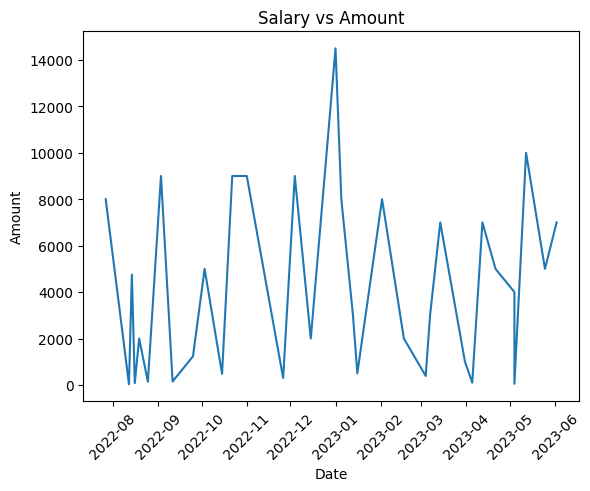

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for rows with category 'Salary'
salary_df = df[df['category'] == 'Salary']

# Plot the 'amount' column against 'Salary'
plt.plot(salary_df['date'], salary_df['amount'])

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Salary vs Amount')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


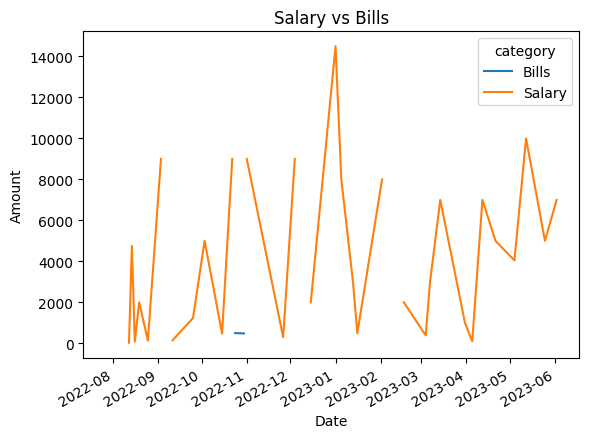

In [18]:
# Filter the DataFrame for rows with category 'Salary' or 'Bills'
filtered_df = df[df['category'].isin(['Salary', 'Bills'])]

# Pivot the DataFrame to have 'date' as index and 'category' as columns, and sum the 'amount' values
pivot_df = filtered_df.pivot_table(values='amount', index='date', columns='category', aggfunc='sum')

# Plot the 'Salary' and 'Bills' columns
pivot_df.plot()

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Salary vs Bills')

# Show the plot
plt.show()

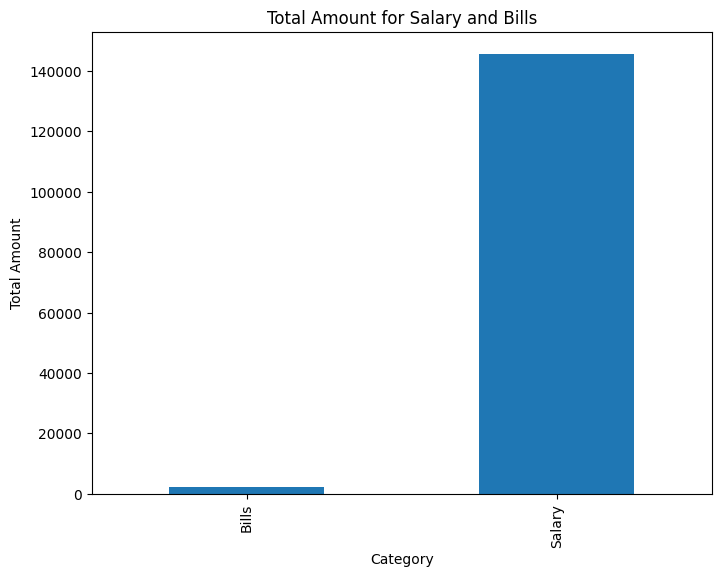

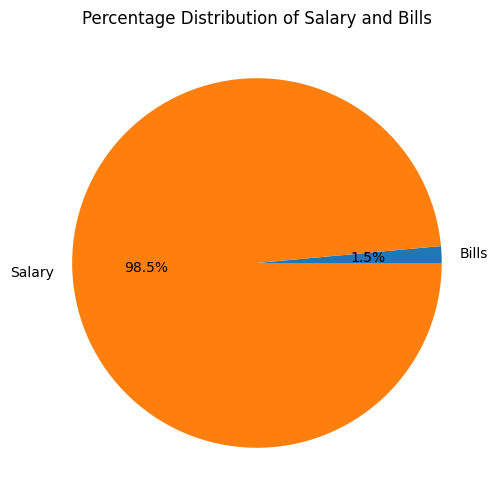

In [19]:
# Filter the DataFrame for rows with category 'Salary' or 'Bills'
filtered_df = df[df['category'].isin(['Salary', 'Bills'])]

# Calculate the sum of 'amount' for each category
category_totals = filtered_df.groupby('category')['amount'].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
category_totals.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount for Salary and Bills')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
category_totals.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Salary and Bills')
plt.ylabel('')
plt.show()

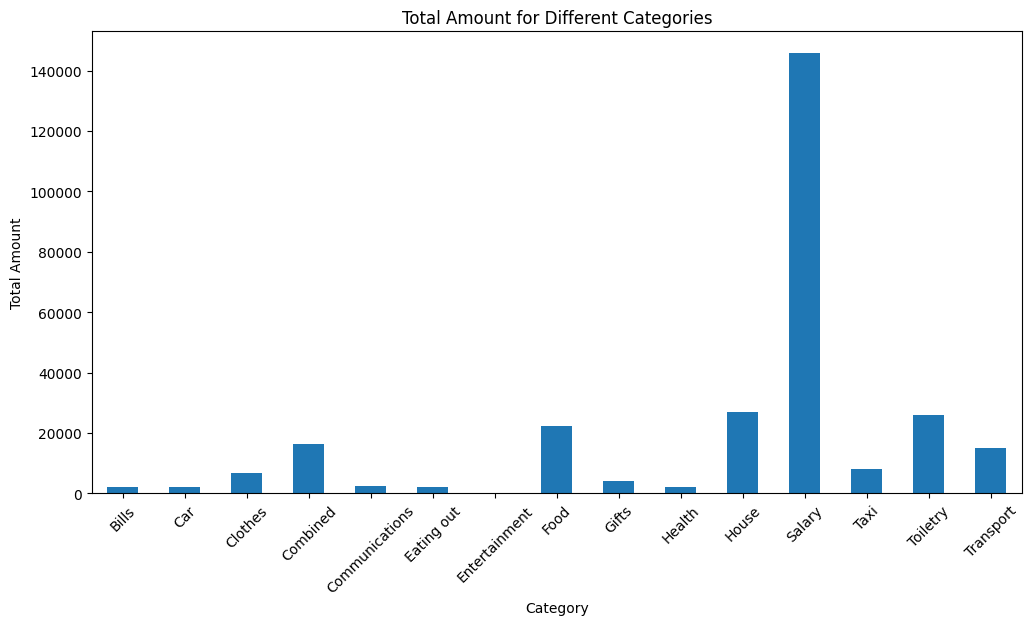

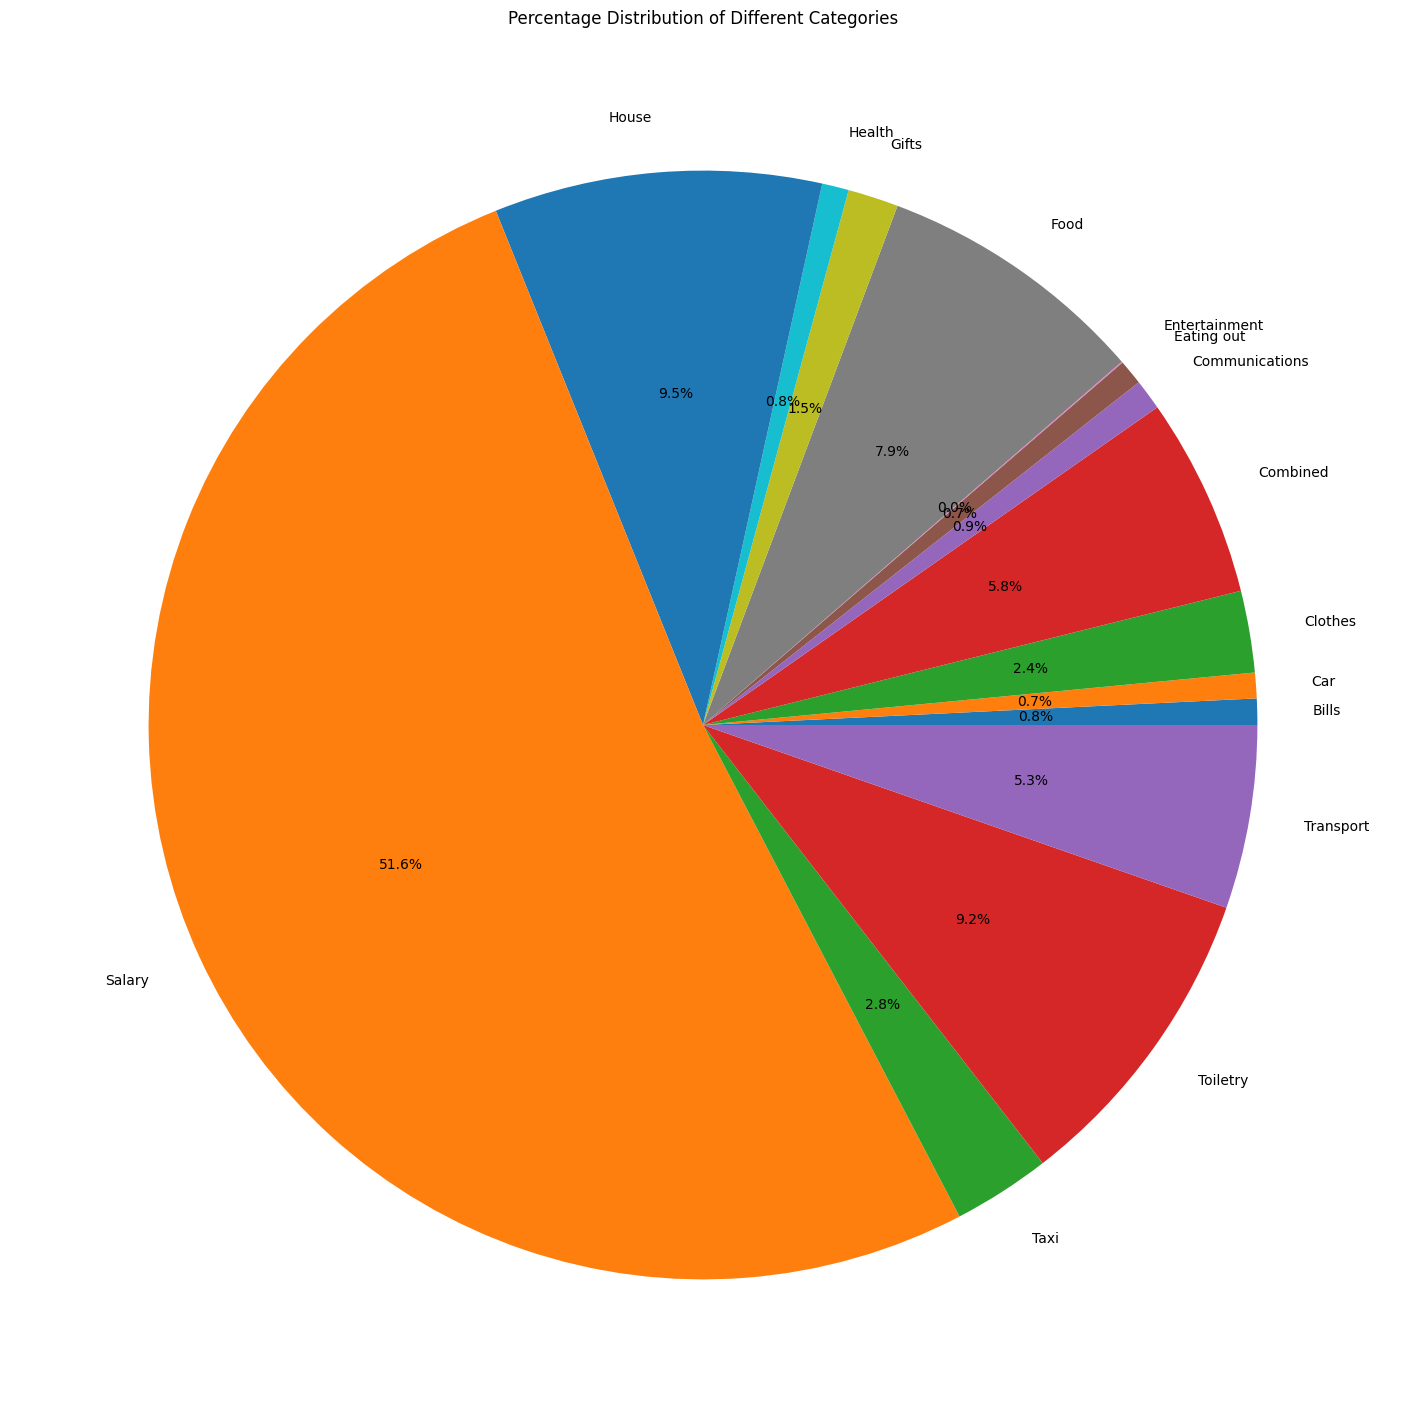

In [20]:
# List of categories to include
categories = ['Bills', 'Car', 'Clothes', 'Combined', 'Communications', 'Eating out', 'Entertainment',
              'Food', 'Gifts', 'Health', 'House', 'Salary', 'Savings', 'Taxi', 'Toiletry', 'Transport']

# Filter the DataFrame for rows with the specified categories
filtered_df = df[df['category'].isin(categories)]

# Calculate the sum of 'amount' for each category
category_totals = filtered_df.groupby('category')['amount'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount for Different Categories')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart
plt.figure(figsize=(18, 18))
category_totals.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Different Categories')
plt.ylabel('')
plt.show()

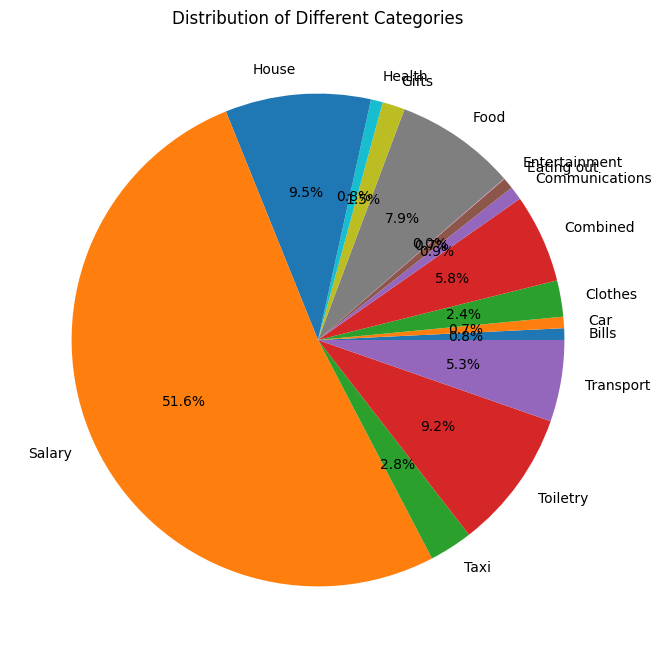

In [21]:
# List of categories to include
categories = ['Bills', 'Car', 'Clothes', 'Combined', 'Communications', 'Eating out', 'Entertainment',
              'Food', 'Gifts', 'Health', 'House', 'Salary', 'Savings', 'Taxi', 'Toiletry', 'Transport']

# Filter the DataFrame for rows with the specified categories
filtered_df = df[df['category'].isin(categories)]

# Calculate the sum of 'amount' for each category
category_totals = filtered_df.groupby('category')['amount'].sum()

# Create a pie chart with category labels
plt.figure(figsize=(8, 8))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%')
plt.title('Distribution of Different Categories')
plt.show()

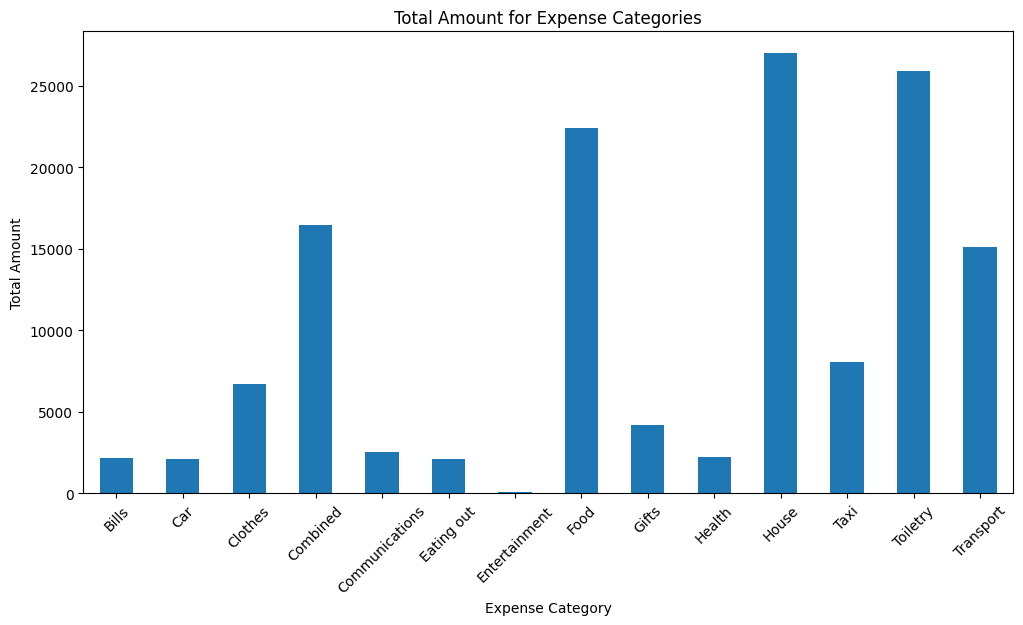

In [22]:
# Filter the DataFrame for expense categories (excluding 'Salary')
expense_df = df[df['category'] != 'Salary']

# Group the DataFrame by 'category' and calculate the sum of 'amount'
category_totals = expense_df.groupby('category')['amount'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount')
plt.title('Total Amount for Expense Categories')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Convert the 'amount' column to numeric type
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Calculate the total salary
total_salary = df[df['category'] == 'Salary']['amount'].sum()
print(total_salary)

# Calculate the total expenses
total_expenses = df[df['category'] != 'Salary']['amount'].sum()
print(total_expenses)
# Calculate the remaining amount
remaining_amount = total_salary - total_expenses

# Print the remaining amount
print("Remaining Amount: ", remaining_amount)

145703.0
136887.55
Remaining Amount:  8815.450000000012


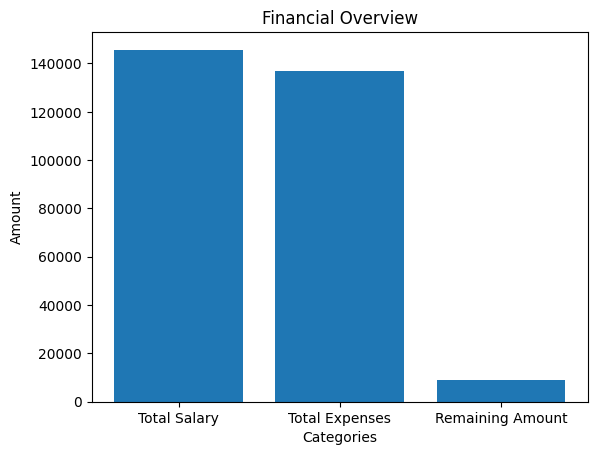

In [24]:
# Create a bar plot
plt.bar(['Total Salary', 'Total Expenses', 'Remaining Amount'], [total_salary, total_expenses, remaining_amount])

# Set plot title and axis labels
plt.title('Financial Overview')
plt.xlabel('Categories')
plt.ylabel('Amount')

# Display the plot
plt.show()

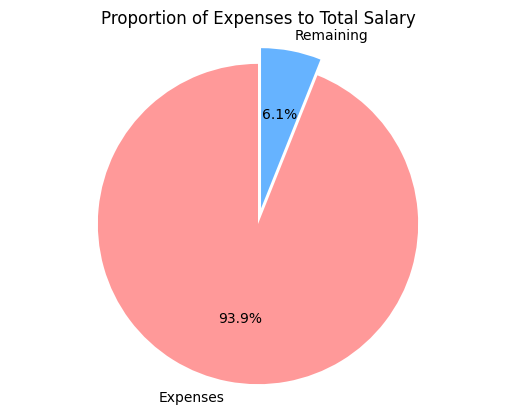

In [25]:
import matplotlib.pyplot as plt

# Prepare the data
labels = ['Expenses', 'Remaining']
sizes = [total_expenses, remaining_amount]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (expenses)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Expenses to Total Salary')

# Display the chart
plt.show()


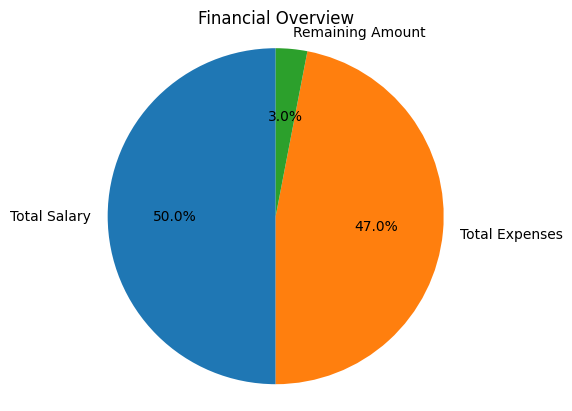

In [26]:
import matplotlib.pyplot as plt

# Data for the pie chart
categories = ['Total Salary', 'Total Expenses', 'Remaining Amount']
amounts = [total_salary, total_expenses, remaining_amount]

# Create the pie chart
plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Financial Overview')

# Set aspect ratio to be equal to make the pie chart a circle
plt.axis('equal')

# Display the plot
plt.show()


In [27]:
# Calculate the total income
total_income = df[df['category'] == 'Salary']['amount'].sum()

# Calculate the total expenses
total_expenses = df[df['category'] != 'Salary']['amount'].sum()

# Calculate the remaining amount
remaining_amount = total_income - total_expenses

# Evaluate the budget
if remaining_amount > 0:
    budget_evaluation = "Good budget: You have surplus funds."
elif remaining_amount == 0:
    budget_evaluation = "Break-even budget: Your income matches expenses."
else:
    budget_evaluation = "Bad budget: Your expenses exceed your income."

# Print the budget evaluation
print(budget_evaluation)


Good budget: You have surplus funds.


Suppose i took combined expense from sakshi

In [28]:
# Filter the DataFrame for rows with category 'Bills' and sum the 'amount' values
bills_total = df[df['category'] == 'Combined']['amount'].sum()

# Print the total of bills
print(bills_total)

16454.5


In [29]:
result = bills_total / 2
print(result)

8227.25


In [30]:
# Convert the 'amount' column to numeric type
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Calculate the total salary
total_salary = df[df['category'] == 'Salary']['amount'].sum()
print("total_salary: ",total_salary)

# Calculate the total expenses
total_expenses = df[df['category'] != 'Salary']['amount'].sum()
print("total_expenses: ", total_expenses)
# Calculate the remaining amount
remaining_amount = total_salary - total_expenses

# Print the remaining amount
print("Remaining Amount: ", remaining_amount+7632.25)

total_salary:  145703.0
total_expenses:  136887.55
Remaining Amount:  16447.70000000001


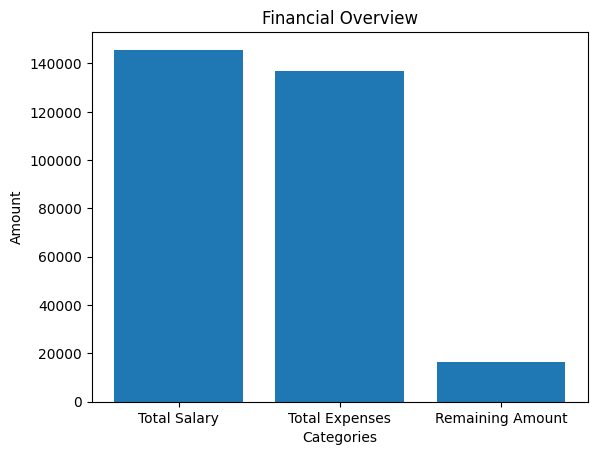

In [31]:
# Data for the bar graph
categories = ['Total Salary', 'Total Expenses', 'Remaining Amount']
amounts = [total_salary, total_expenses, remaining_amount+7632.25]

# Create the bar plot
plt.bar(categories, amounts)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Amount')
plt.title('Financial Overview')

# Display the plot
plt.show()

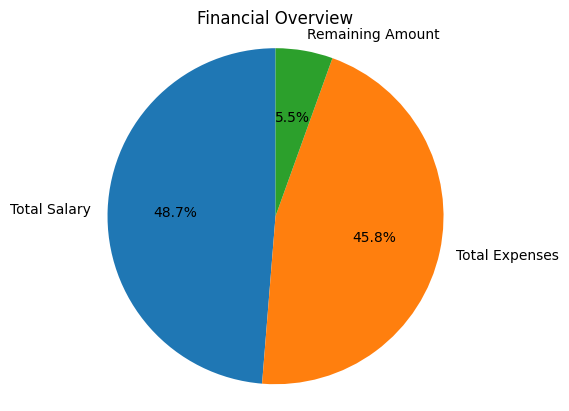

In [32]:
import matplotlib.pyplot as plt

# Data for the pie chart
categories = ['Total Salary', 'Total Expenses', 'Remaining Amount']
amounts = [total_salary, total_expenses, remaining_amount+7632.25]

# Create the pie chart
plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Financial Overview')

# Set aspect ratio to be equal to make the pie chart a circle
plt.axis('equal')

# Display the plot
plt.show()


In [36]:
# Calculate the total income
total_income = df[df['category'] == 'Salary']['amount'].sum()

# Calculate the total expenses
total_expenses = df[df['category'] != 'Salary']['amount'].sum()

# Calculate the remaining amount
remaining_amount = total_income - total_expenses

# Calculate 20% of the total income
twenty_percent_income = total_income * 0.1

# Calculate the percentage of remaining amount
percentage_remaining = (remaining_amount / total_income) * 100

# Evaluate the budget
if remaining_amount > twenty_percent_income:
    budget_evaluation = "Good budget: Your remaining amount is greater than 10% of your total income."
elif remaining_amount == twenty_percent_income:
    budget_evaluation = "Break-even budget: Your remaining amount is equal to 10% of your total income."
else:
    budget_evaluation = "Bad budget: Your remaining amount is less than 10% of your total income."

# Print the budget evaluation
print(budget_evaluation)

# Print the total income
print("Total income: ", total_income)

# Print the percentage of remaining amount
print("Percentage of remaining amount: {:.2f}%".format(percentage_remaining))

Bad budget: Your remaining amount is less than 10% of your total income.
Total income:  145703.0
Percentage of remaining amount: 6.05%
